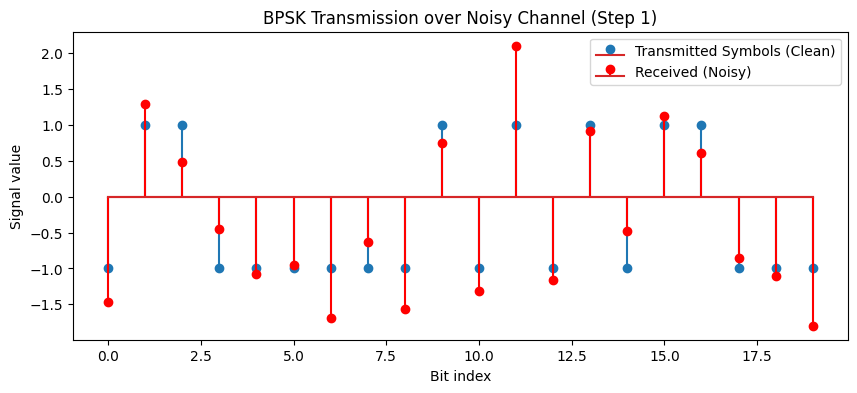

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate random bits
N = 20  # number of bits
bits = np.random.randint(0, 2, N)  # 0s and 1s

# Step 2: BPSK modulation (0 -> -1, 1 -> +1)
symbols = 2*bits - 1  # maps {0,1} to {-1,+1}

# Step 3: Add Gaussian noise
noise = np.random.normal(0, 0.5, N)  # mean=0, std=0.5
received = symbols + noise

# Step 4: Plot clean vs noisy symbols
plt.figure(figsize=(10,4))
plt.stem(symbols, label="Transmitted Symbols (Clean)")
plt.stem(received, linefmt='r-', markerfmt='ro', label="Received (Noisy)")
plt.legend()
plt.xlabel("Bit index")
plt.ylabel("Signal value")
plt.title("BPSK Transmission over Noisy Channel (Step 1)")
plt.show()

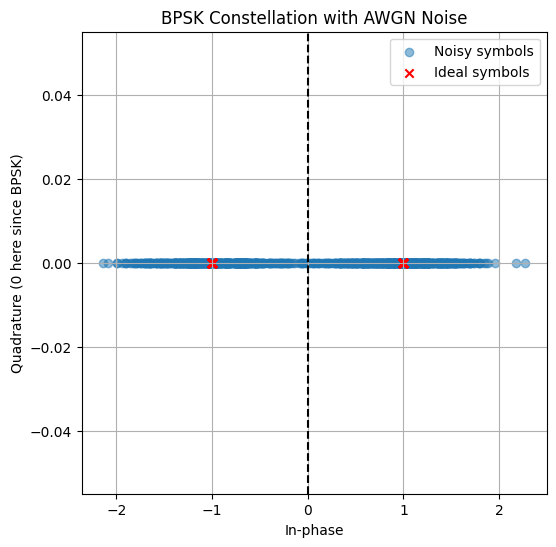

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000   # number of bits
SNR_dB = 5  # Signal-to-Noise Ratio in dB

# Step 1: Generate random bits
bits = np.random.randint(0, 2, N)

# Step 2: BPSK modulation (0 -> -1, 1 -> +1)
symbols = 2*bits - 1

# Step 3: Add Gaussian noise (AWGN)
SNR_linear = 10**(SNR_dB/10)  # dB to linear
noise_std = 1/np.sqrt(2*SNR_linear)  # noise standard deviation
noise = np.random.normal(0, noise_std, N)
received = symbols + noise

# Step 4: Scatter plot (constellation)
plt.figure(figsize=(6,6))
plt.scatter(received, np.zeros(N), alpha=0.5, label="Noisy symbols")
plt.scatter(symbols, np.zeros(N), color='red', marker='x', label="Ideal symbols")
plt.axvline(0, color='black', linestyle='--')
plt.title("BPSK Constellation with AWGN Noise")
plt.xlabel("In-phase")
plt.ylabel("Quadrature (0 here since BPSK)")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import numpy as np

# Parameters
N = 5000       # number of training samples
SNR_dB = 5     # Signal-to-Noise Ratio in dB

# Step 1: Generate random bits
bits = np.random.randint(0, 2, N)

# Step 2: BPSK modulation (0 -> -1, 1 -> +1)
symbols = 2*bits - 1

# Step 3: Add AWGN noise
SNR_linear = 10**(SNR_dB/10)
noise_std = 1/np.sqrt(2*SNR_linear)
noise = np.random.normal(0, noise_std, N)
received = symbols + noise

# Step 4: Create dataset
X = received.reshape(-1, 1)   # features (noisy signals)
y = bits                      # labels (original bits)

print("Dataset prepared!")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Example X[0:5]:", X[0:5].flatten())
print("Example y[0:5]:", y[0:5])


Dataset prepared!
X shape: (5000, 1)
y shape: (5000,)
Example X[0:5]: [-0.8735099   0.99155001  0.28543268  1.06738602  0.91604972]
Example y[0:5]: [0 1 1 1 1]


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Test predictions
y_pred = svm.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", acc)


SVM Accuracy: 0.9946666666666667


In [6]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Test predictions
y_pred_tree = dtree.predict(X_test)

# Accuracy
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", acc_tree)


Decision Tree Accuracy: 0.992


In [7]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(16, 8),
                    activation='relu',
                    solver='adam',
                    max_iter=500,
                    random_state=42)
mlp.fit(X_train, y_train)

# Test predictions
y_pred_mlp = mlp.predict(X_test)

# Accuracy
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print("Neural Network (MLP) Accuracy:", acc_mlp)


Neural Network (MLP) Accuracy: 0.9946666666666667


SVM Accuracy: 0.9946666666666667
Decision Tree Accuracy: 0.992
Neural Network (MLP) Accuracy: 0.9946666666666667


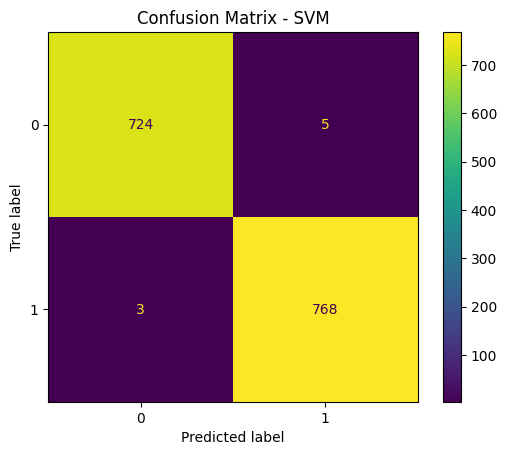

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Print accuracies
print("SVM Accuracy:", acc)
print("Decision Tree Accuracy:", acc_tree)
print("Neural Network (MLP) Accuracy:", acc_mlp)

# Confusion Matrix for SVM
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.title("Confusion Matrix - SVM")
plt.show()


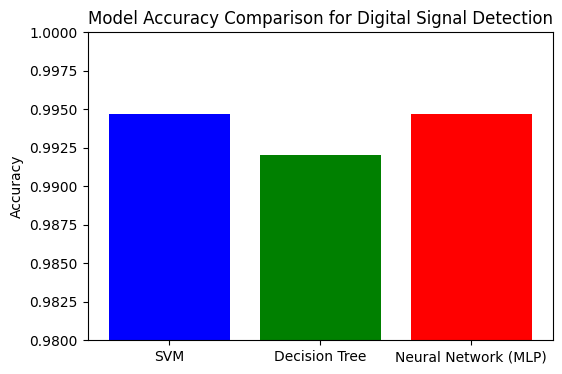

📌 Final Results Summary:
SVM: 0.9947
Decision Tree: 0.9920
Neural Network (MLP): 0.9947


In [10]:
import matplotlib.pyplot as plt

# Store accuracies
models = ["SVM", "Decision Tree", "Neural Network (MLP)"]
accuracies = [acc, acc_tree, acc_mlp]

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=['blue','green','red'])
plt.ylim(0.98, 1.0)  # zoom into 98–100% for better view
plt.title("Model Accuracy Comparison for Digital Signal Detection")
plt.ylabel("Accuracy")
plt.show()

# Print summary
print("📌 Final Results Summary:")
for model, acc in zip(models, accuracies):
    print(f"{model}: {acc:.4f}")